In [1]:
%matplotlib inline
from pylab import *
from ipywidgets import interact, widgets
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
pi = np.pi


In [2]:
from forward_kinematics import ForwardKinematicsAgent
agent = ForwardKinematicsAgent() #so he wont constantly try to get up when he is down

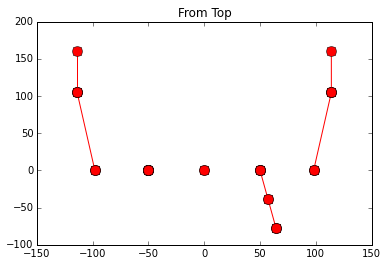

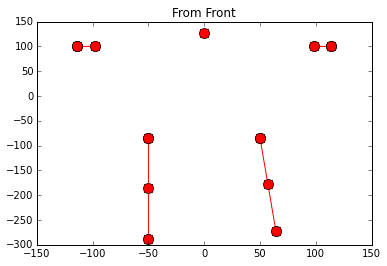

In [3]:
def plot_forward():
    cla()
    for chain in agent.chains.values():
        x = deque(maxlen=30)
        y = deque(maxlen=30)
        z = deque(maxlen=30)
        for joint in chain:
            x.append(agent.transforms[joint][0][-1])
            y.append(agent.transforms[joint][1][-1])
            z.append(agent.transforms[joint][2][-1])
            
        for i in range(len(x) - 1):
            plt.figure(1)
            plot([-y[i], -y[i + 1]],[x[i], x[i + 1]], '-or', markersize = 10)
            plt.figure(2)
            plot([-y[i], -y[i + 1]],[z[i], z[i + 1]], '-or', markersize = 10)
    plt.figure(1)
    plt.title("From Top")
    plt.figure(2)
    plt.title("From Front")
    display.clear_output(wait=True)
    plt.show(gcf())

#setup Buttons:
buttons = []
thisTime = 0.
def updateOnClick(ev = None):
    plot_forward()
updateButton = widgets.Button(description = "update plot")
updateButton.on_click(updateOnClick)

#setup interactive rest
joint_name='HeadYaw'
@interact(name=agent.joint_names)
def set_test_joint(name):
    global agent
    global joint_name
    joint_name = name
    agent.testJoint = joint_name
@interact(value=(-pi/2, pi/2, pi/40))
def set_joint_target(value):
    agent.target_joints[joint_name] = value
    plot_forward()
display.display(updateButton)

In [4]:
# inject plotting input agent's loop

agent.start()